<a href="https://colab.research.google.com/github/HASSAN1A/Explore/blob/main/Train_Test_Split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assessing Model Accuracy: The Train/Test Split

© Explore Data Science Academy

## Learning Objectives
In this train you will learn how to:

- Split a dataset into two parts for the model training process;
- Understand the theory about an additional _validation_ set;
- Carry out the train/test split using `sklearn`; and,
- Review the performance of the model on both the training and testing sets.

## Outline

Within the various sections of this Train we will:

- Bring in the data;
- Split it into training and testing sets;
- Train a linear regression model using the training set;
- Assess the perfomance of the model on both data subsets.

## Introduction

### Two-Way Split

When fitting a machine learning model to some data, we ultimately intend to use that model to make predictions/forecasts on real-world data. Real-world data is unseen - it doesn't exist in the dataset we have at our disposal - so in order to validate our model (check how well it performs), we need to test it on unseen data too.

However, gathering unseen data is not as simple as collecting it from outside the window and exposing it to the model: any new data would need to be cleaned, wrangled and annotated just like the data in our dataset. The next best thing, then, is to simulate some unseen data, which we can do using the existing dataset by splitting it into two sets:

- One for training the model; and
- A second for testing it.
   
We fit a model using the training data, and then assess its accuracy using the test set.

We will use 80% of the data for training and keep 20% aside for testing. In other words, the training set will contain 80% of the rows, or data points, and the remaining 20% of rows will be in the test set. These rows are selected at random, to ensure that the mix of data in the train set is as close as possible to the mix in the test set.

### Three-Way Split

Many academic works on machine learning talk about splitting the dataset into three distinct parts: `train, validation,` and `test` sets. The idea here is that, as before, the training set is used to fit the model to the observations. Thereafter, during the model tuning process where hyperparameters are tweaked and decisions on the dataset is made, the validation set is used to test the performance of the model.

Once the model designer is satisfied with the performance of the model on the validation set, the previously unseen test set is brought out and used to provide an unbiased evaluation of a final model fit on the training dataset.

### Caveats for using a validation set

On small datasets, it may not be feasible to include a validation set for the following reasons, both of which should be intuitive:

- The model may need every possible data point to adequately determine model values;
- For small enough test sets, the uncertainty of the test set can be considerably large to the point where different test sets may produce very different results.

Clearly, further splitting the training data into training and validation sets would remove precious observations for the training process.

### Cross-Validation

In the case that the designer does not desire to use a validation set, or there is simply not enough data, a technique known as cross validation may be used. A common version of cross validation is known as K-fold cross validation: during the training process, some proportion of the training data, say 10%, is held back, and effectively used as a validation set while the model parameters are calcuated.

## Getting started
Same as before, we will need to import a few Python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

Now we will load some data on the Rand exchange rates over time.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/regression_sprint/regression_sprint_data_1.csv', index_col=0)
df.head(10)

,ZAR/USD,Value of Exports (ZAR)
2008M01,7.01,39356.82
2008M02,7.66,46946.33
2008M03,7.97,51150.89
2008M04,7.79,56174.34
2008M05,7.62,56240.45
2008M06,7.92,60159.93
2008M07,7.63,61268.16
2008M08,7.66,60390.94
2008M09,8.06,61067.34
2008M10,9.74,65652.57


In [3]:
# Import the split function from sklearn
from sklearn.model_selection import train_test_split

In [4]:
# Split the dataset into the response, y, and features, X
y = df['ZAR/USD']
X = df.drop('ZAR/USD', axis=1)

We can then call the `train_test_split` function:

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

Let's try to understand the four parameters we'll hand to the splitting function.

- `X` contains the features on which we will be training the model. In this case: just `exports`;
- `y` is the response variable, that which we are trying to predict. In this case: `exchange rate`;
- `test_size` is a value between 0 and 1: the proportion of our dataset that we want to be used as test data. Typically 0.2 (20%);
- `random_state` is an arbitrary value which, when set, ensures that the _random_ nature in which rows are picked to be in the test set is the same each time the split is carried out. In other words, the rows are picked at random, but we can ensure these random picks are repeatable by using the same value here. This makes it easier to assess model performance across iterations.

By plotting the data points in each of the training and testing sets in different colours, we should be able to see that we have a similar _spread_ of data in each (but far fewer data _points_ in the testing set).

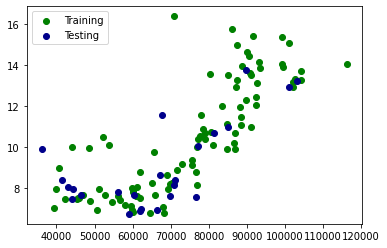

In [6]:
# Plot the results
plt.scatter(X_train, y_train, color='green', label='Training')  # plot the training data in green
plt.scatter(X_test, y_test, color='darkblue', label='Testing')  # plot the testing data in blue
plt.legend()
plt.show()

## Training the linear model

Some quick revision. Model training is the process of exposing a model to our data such that it can learn the patterns and combinations of variables which result in a particular value of the response variable (for example, financial factors combining to produce an exchange rate).

We'll fit our model using the same steps as before, except this time we will expose it only to the training data.

In [7]:
# Import the linear regression module
from sklearn.linear_model import LinearRegression

In [8]:
# Declare the model object
lm = LinearRegression()

Notice, below, that when we fit the model, we provide it with both the features and the response. This way, it can learn which data points map to which output, a crucial part of the model training process.

In [9]:
# Fit the model to the training data (also known as training the model)
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# Extract the intercept, or y-cut, of our linear model
a = float(lm.intercept_)

In [11]:
# Extract the coefficient, or gradient, of our linear model
b = lm.coef_

In [12]:
print("Slope:\t\t", b)
print("Intercept:\t", float(a))

Slope:		 [0.0001199]
Intercept:	 1.4542630444144802


We can get an idea of what the regression line looks like by overlaying it on a scatter plot of the training data.

In order to draw the line, we need to generate the set of points that belong to it. We can do this by using the `predict` method on the model object and having it predict `y`-values from the `X`-values in the training set.

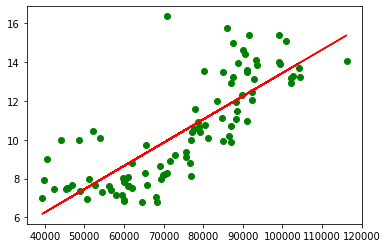

In [13]:
# Generate the values that fall along our regression line
gen_y = lm.predict(X_train)

# Plot the results
plt.scatter(X_train, y_train, color='green')  # Plot the training data in green
plt.plot(X_train, gen_y, color='red')  # Plot the line connecting the generated y-values
plt.show()

Now, let's assess the fit of the line to the training data using `sklearn.metrics`

In [14]:
from sklearn import metrics

In [15]:
print("Training:")
# Calculate the mean-squared-error
print('MSE:', metrics.mean_squared_error(y_train, gen_y))
# Calculate the R-squared metric
print('R_squared:', metrics.r2_score(y_train, gen_y))

Training:
MSE: 2.6125475375589073
R_squared: 0.6402293095045937


## Testing the model on unseen data

Our model has been trained. Now we need to show it some data it's never seen before, and ask it to generate some predictions from that unseen data. In this instance, we don't provide the model with the `y`-values (response variable), because that is akin to giving it the answers we are asking it to predict.

Once it has made the predictions, we compare those predictions to the set of `y`-values corresponding to the test set, but which the model has not seen. Remember, a linear regression model is simply a straight line, and all predictions it makes will lie on that line.

To make those predictions, we again use the `predict` method on the model object, but this time give it the _test_ set from which to make predictions.

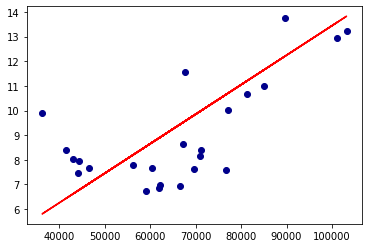

In [16]:
# Generate values of y from x, using the linear model
gen_y_test = lm.predict(X_test)

# Plot the results
plt.scatter(X_test, y_test, color='darkblue')  # Plot the testing data in blue
plt.plot(X_test, gen_y_test, color='red')  # Plot the line connecting the generated y-values in red
plt.show()

Now we'll assess the fit of the line on the unseen testing data by checking MSE and $R^2$ metrics.

In [17]:
print("Testing:")
print('MSE:', metrics.mean_squared_error(y_test, gen_y_test))
print('R_squared:', metrics.r2_score(y_test, gen_y_test))

Testing:
MSE: 3.038981977599916
R_squared: 0.30031043412578884


Mean squared error is higher on the test set than the train set, indicating poor predictive accuracy, and R-squared is lower on the test set, indicating a worse fit on the test set.

These results indicate a concept in machine learning model fitting known as _overfitting_. This is a phenomenon where there is:

- A discrepancy between the performance of the model on train and on test sets; and
- An inability of the model to _generalise_ to data it has not seen before.

The term comes from the fact that the model fits too well, or overfits, the training data, and does not fit well, or underfits, the testing data. 

In the trains to follow, we'll look at ways to improve model performance as well as prevent or mitigate overfitting.

## Conclusion

In this train we have seen or been introduced to:
- The concept of _unseen_ data, from the perspective of the model;
- Splitting a dataset into training and testing subsets;
- Calculating or interpreting model parameters (slope, intercept) using the training set;   
- Assessing the accuracy and fit of the model on the testing set.

In future trains, we will look at methods for improving the predictive accuracy of our model.

## Appendix

Below are links to additional resources to help you with some of concepts presented in the train:

- [Video on overfitting](https://www.youtube.com/watch?v=mfzHchd5La8)